<a href="https://colab.research.google.com/github/ErrorNginx/My-project-google-colab/blob/main/data%20cleansing%20titaknik%20/%20data_cleansing_titanik_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleansing

Hi Saya agus.. Disini saya akan coba sedikit sharing2 tentang proses Data Cleansing.. 

Disini kita ingin melihat variable mana yg paling berkorelasi dengan data Survived..


import beberapa library yang akan dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

buat data frame kemudian load dataset nya

disini dataset yg digunakan adalah data Titanic.csv

In [ ]:
df = pd.read_csv('data/Titanic.csv')

tampilkan dataset yg sudah di load

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


periksa kondisi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# Column Age

tampilkan visualisasi column nya

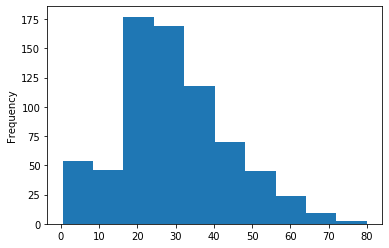

In [ ]:
df.Age.plot(kind='hist');

karna column Age berdistribusi skewness

maka kita akan lakukan imputation pada column Age dengan menggunakan median

In [ ]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

tampilkan info dataset untuk melihat apakah column Age sudah ter imputation

ternyata column Age sekarang sudah berubah jumlah nya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# Column Cabin

jumlah seluruh data entry adalah 891, sementara column Cabin berjumlah 204

artinya terdapat data null pada column Cabin

tampilkan proporsi dari data column Cabin

In [ ]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
C22 C26        3
              ..
B102           1
C99            1
D28            1
D15            1
E63            1
Name: Cabin, Length: 147, dtype: int64

terlihat bahwa value column Cabin terlalu banyak data unique nya

dan juga info column Cabin tidak terlalu informatif untuk mengetahui data Survived

maka kita akan hapus column Cabin

In [ ]:
df.drop('Cabin', axis=1, inplace = True)

tampilkan info dataset untuk melihat apakah column Cabin sudah terhapus

ternyata column Cabin sekarang sudah tidak muncul

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


# Column Embarked

jumlah seluruh data entry adalah 891, sementara column Embarked berjumlah 889

artinya terdapat data null pada column Embarked 

kita periksa di lokasi manakah data null tersebut

In [ ]:
df.Embarked[df.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

tampilkan proporsi dari data column Embarked

ternyata data column Embarked berupa data categoric

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

bila kita akan melakukan imputation pada column Embarked

maka kita periksa type data column Embarked terlebih dahulu

data column Embarked berupa data categoric maka imputation nya menggunakan mode nya

dari proporsi column Embarked itu S adalah data yang paling sering muncul maka S adalah mode nya

In [ ]:
val = df.Embarked.mode().values[0]
df['Embarked'] = df.Embarked.fillna(val)

setelah dilakukan imputation terlihat bahwa proporsi nya sudah berubah

In [ ]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

# Column SibSp dan Column Parch

kita akan melakukan manipulasi data

manipulasi disini bukan untuk merubah nilai data

tetapi untuk mempermudah data ini dibaca oleh mesin

column SibSp (sibling Spouse) bermakna column yang menyatakan jumlah saudara atau jumlah pasangan yg dibawa oleh Passenger

column Parch (Parent Children) bermakna column yang menyatakan jumlah orang tua atau jumlah anak yg dibawa oleh Passenger

kita akan bikin column baru yg menampilkan apakah dia sendiri atau membawa keluarga

In [ ]:
df['Alone']=df['SibSp']+df['Parch']

In [ ]:
df['Alone'][df['Alone']>0]='With Family'
df['Alone'][df['Alone']==0]='Without Family'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


munculkan tampilan data terbaru

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Without Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Without Family


# Hubungan Antara Column Sex dan Column Survived

kita lihat proporsi Column Sex yang Survived



In [ ]:
df.Sex[df['Survived']==1].value_counts()

female    233
male      109
Name: Sex, dtype: int64

tampilkan visualisasi Column Sex yang Survived

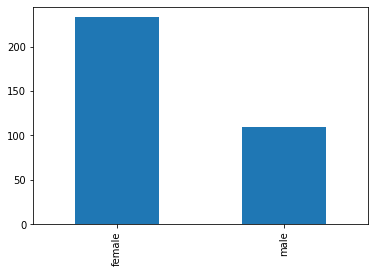

In [ ]:
df.Sex[df['Survived']==1].value_counts().plot(kind='bar');

kita bandingkan dengan column Sex yg tidak survived

In [ ]:
df.Sex[df['Survived']==0].value_counts()

male      468
female     81
Name: Sex, dtype: int64

tampilkan visualisasi Column Sex yang tidak Survived

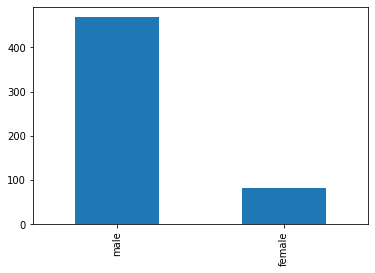

In [ ]:
df.Sex[df['Survived']==0].value_counts().plot(kind='bar');

# Pivot

In [ ]:
def make_pivot(param1, param2):     
    df_slice = df[[param1, param2, 'PassengerId']]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)     
    p_chart = slice_pivot.plot(kind='bar');     
    for p in p_chart.patches:         
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))     
        return slice_pivot     
        return p_chart

# Pivot Antara Column Sex dan Column  Survived

PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

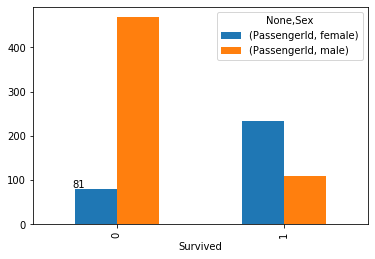

In [ ]:
make_pivot('Survived', 'Sex')

# Sekian

Sekian dulu untuk sedikit sharing2 kali ini ya.. Terima kasih ^^